In [2]:
from impedance.models.circuits.elements import element
from impedance.models.circuits import CustomCircuit
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mpmath import *
from models import *

c:\Users\Gaming\AppData\Local\Programs\Python\Python311\Lib\site-packages\impedance\models\circuits\circuits.py:145: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")


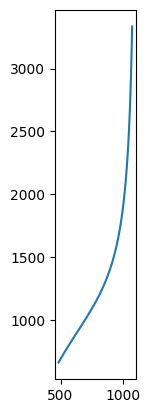

In [10]:
R1, R1Q, R2Q, delta1, alpha = 1000, 1000*1e-4, 2000*2e-4, 0.4, 1

param=[R1, R1Q, R2Q, delta1, alpha]
c_sim_two=CustomCircuit(initial_guess=param,circuit="TLMtwo")

freq=np.logspace(0,1,100)

z_sim_two=c_sim_two.predict(frequencies=freq)
plt.plot(np.real(z_sim_two),-np.imag(z_sim_two))
plt.gca().set_aspect("equal")